In [1]:
%pylab inline
%matplotlib notebook
import time
import pandas

Populating the interactive namespace from numpy and matplotlib


## Accuracy Results

<IPython.core.display.Javascript object>


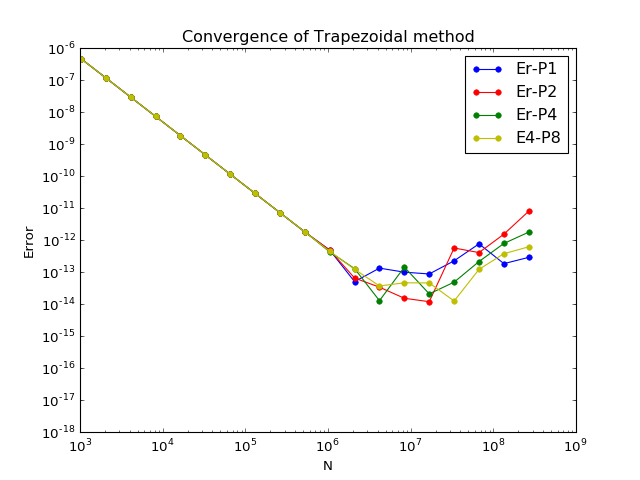

In [2]:
file_prefix = 'trap_'
nprocs = [2**i for i in range (0, 4)]
Nvec = []
soln = []
err = []
t = []
rate = []
counter = 0
for i in nprocs:
    filename = (file_prefix + '{:02d}'.format(i) + '.out')
    T = loadtxt(filename)
    time.sleep(0.1)
    Nvec.append(T[:,0].astype('int'))
    soln.append(T[:,1])
    err.append(T[:,2])
    t.append(T[:,3])
    rate.append(log2(abs(err[counter][:-1])/abs(err[counter][1:])).reshape(-1,1))

plt.loglog(Nvec[0],abs(err[0]),'b.-',markersize=10)
plt.loglog(Nvec[1],abs(err[1]),'r.-',markersize=10)
plt.loglog(Nvec[2],abs(err[2]),'g.-',markersize=10)
plt.loglog(Nvec[3],abs(err[3]),'y.-',markersize=10)

xlabel('N')
ylabel('Error')
title('Convergence of Trapezoidal method');

c = polyfit(log(Nvec[0][:-10]),log(abs(err[0][:-10])),1)
plt.loglog(Nvec,exp(polyval(c,log(Nvec))),'k-')
legend(["Er-P1","Er-P2","Er-P4","E4-P8"])

<hr/>

## Show results in a table

Create and print a Pandas table displaying results. We will add a column containing the convergence rate.

To compute the convergence rate, we assume that the error in our trapezoidal rule is given as a function of $h = (b-a)/N$.  

\begin{equation}
e(h) \sim Ch^r
\end{equation}

For a second order method, we expect the convergence rate $r$ to satisfy $r \sim 2$.  To numerically estimate $r$, we further assume that $e_i$ is the error computed using a mesh width $h$ and $e_{i+1}$ is the error on mesh width $h/2$.  Furthermore, for small $h$, we assume that the constant $C$ is independent of $h$.   Then, 
\begin{equation}
\frac{e_{i}}{e_{i+1}} = \frac{C h^r}{C(h/2)^r} \sim 2^r
\end{equation}

We can then compute the numerical converence rate $r_i$ as
\begin{equation}
r_i = \log_2\left(\frac{e_{i}}{e_{i+1}}\right)
\end{equation}
for errors $e_i$.  

In [3]:
df = pandas.DataFrame({'N' : Nvec[0],
                      'err0' : err[0],  'err1' : err[1], 'err2' : err[2], 'err3' : err[3],
                      't0'   : t[0],    't1'   : t[1],   't2'   : t[2],   't3'   : t[3]
                      })
di = {'err0' : 'Error P1',
      'err1' : 'Error P2',
      'err2' : 'Error P4',
      'err3' : 'Error P8',
      't0'   : 'Time P1 (s)',
      't1'   : 'Time P2 (s)',
      't2'   : 'Time P4 (s)',
      't3'   : 'Time P8 (s)'}

pr = df.rename(columns=di).style
exact_soln = 1.87259295726583875460;  # Copied from output
pr.set_caption("True solution is {:20.16f}".format(exact_soln))
pr

,N,Error P1,Error P2,Error P4,Error P8,Time P1 (s),Time P2 (s),Time P4 (s),Time P8 (s)
0,1024,-4.6778e-07,-4.6778e-07,-4.6778e-07,-4.6778e-07,0.0106,0.0103,0.0088,0.0255
1,2048,-1.1695e-07,-1.1695e-07,-1.1695e-07,-1.1695e-07,0.0099,0.0101,0.00873,0.0178
2,4096,-2.9236e-08,-2.9236e-08,-2.9236e-08,-2.9236e-08,0.00981,0.0111,0.01,0.0189
3,8192,-7.3091e-09,-7.3091e-09,-7.3091e-09,-7.3091e-09,0.00915,0.011,0.00987,0.0284
4,16384,-1.8273e-09,-1.8273e-09,-1.8273e-09,-1.8273e-09,0.00945,0.0105,0.00946,0.0191
5,32768,-4.568e-10,-4.5681e-10,-4.5682e-10,-4.5682e-10,0.00982,0.0117,0.00956,0.0211
6,65536,-1.1419e-10,-1.1419e-10,-1.1421e-10,-1.1421e-10,0.0114,0.0122,0.0113,0.0196
7,131072,-2.8565e-11,-2.8555e-11,-2.8544e-11,-2.8555e-11,0.0144,0.012,0.012,0.0172
8,262144,-7.1541e-12,-7.1376e-12,-7.1252e-12,-7.1319e-12,0.019,0.0156,0.0136,0.0243
9,524288,-1.769e-12,-1.7855e-12,-1.8101e-12,-1.785e-12,0.0286,0.0233,0.0147,0.0244


In [4]:
rate = []
for i in range(4):
    rate.append(log2(abs(err[i][:-1]/err[i][1:])))


df1 = pandas.DataFrame({'N'   : Nvec[0],
                      'rate0' : hstack((numpy.nan,rate[0])),
                      'rate1' : hstack((numpy.nan,rate[1])),
                      'rate2' : hstack((numpy.nan,rate[2])),
                      'rate3' : hstack((numpy.nan,rate[3]))})

di1 = {'rate0' : 'Rate P1',
       'rate1' : 'Rate P2',
       'rate2' : 'Rate P4',
       'rate3' : 'Rate P8'}

pr1 = df1.rename(columns=di1).style
pr1

,N,Rate P1,Rate P2,Rate P4,Rate P8
0,1024,nan,nan,nan,nan
1,2048,1.99994,1.99994,1.99994,1.99994
2,4096,2.00007,2.00007,2.00007,2.00007
3,8192,1.99998,1.99998,1.99998,1.99998
4,16384,1.99998,1.99998,1.99998,1.99998
5,32768,2.00008,2.00005,2.00002,2.00002
6,65536,2.00013,2.00016,1.99994,1.99994
7,131072,1.99912,1.99962,2.00043,1.99987
8,262144,1.99741,2.00023,2.00219,2.00139
9,524288,2.01584,1.99911,1.97686,1.99836
